# Christian Rosado - HW 11 Assignment 1 

In [1]:
# importing all necessary dependencies
%matplotlib inline
import matplotlib.pylab as plt
import seaborn
from geopandas import GeoDataFrame
from fiona.crs import from_epsg
import fiona
import shapely
import os

In [4]:
# Dowloading shapefile to PUIdata
os.system("curl -O http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip")
os.system("mv nycb2010_16d.zip PUIDATA")
os.system("sudo apt-get install unzip")
os.system("unzip " + os.getenv("PUIDATA") + "/nycb2010_16d.zip -d" + os.getenv("PUIDATA"))

0

In [5]:
# creating path to shapefile
shape_path= os.getenv("PUIDATA") + "/nycb2010_16d/nycb2010.shp"
ct_shape = GeoDataFrame.from_file(shape_path)

In [6]:
# extracting brooklyn area from shapefile
ct_shape_bk = ct_shape[ct_shape['BoroName'] == 'Brooklyn']

In [7]:
# CUSP lat lon coordinate points (lon, lat)
nyu_cusp = (-73.9866, 40.6931)

In [8]:
nyu_cusp[0]

-73.9866

In [9]:
point = shapely.geometry.Point(nyu_cusp)

In [10]:
point.x

-73.9866

In [11]:
# changing shapefile's code space to match lat lon coordinate system
# only Brooklyn
ct_shape_bk.crs = from_epsg(2263)
ct_shape_bk_latlon = ct_shape_bk.to_crs(epsg=4326) 

In [12]:
# changing shapefile's code space to match lat lon coordinate system
# All of NYC
ct_shape.crs = from_epsg(2263)
ct_shape_latlon = ct_shape.to_crs(epsg=4326) 

In [13]:
ct_shape_bk.crs

{'init': 'epsg:2263', 'no_defs': True}

In [14]:
ct_shape_bk_latlon.crs

{'init': 'epsg:4326', 'no_defs': True}

In [15]:
# verifying that code space changed for the first five polygon shapes
ct_shape_bk_latlon.geometry[:5]

5037    POLYGON ((-74.00659158337982 40.65561273365177...
5038    POLYGON ((-73.99514512602698 40.69877384567194...
5039    POLYGON ((-73.99270830309769 40.69809925981345...
5040    POLYGON ((-73.98514306089652 40.6948851429698,...
5041    POLYGON ((-73.98305147125492 40.69837793354038...
Name: geometry, dtype: object

In [16]:
# checking if NYU CUSP is located within our Brooklyn shapefile
# yes, we were successful
for ct in ct_shape_bk_latlon.geometry:
    shape = shapely.geometry.asShape(ct)
    if shape.contains(point):
        print('Found shape for %s.'%(point))
        

Found shape for POINT (-73.9866 40.6931).


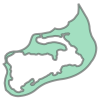

In [17]:
# interesting shape
shapely.geometry.asShape(ct)

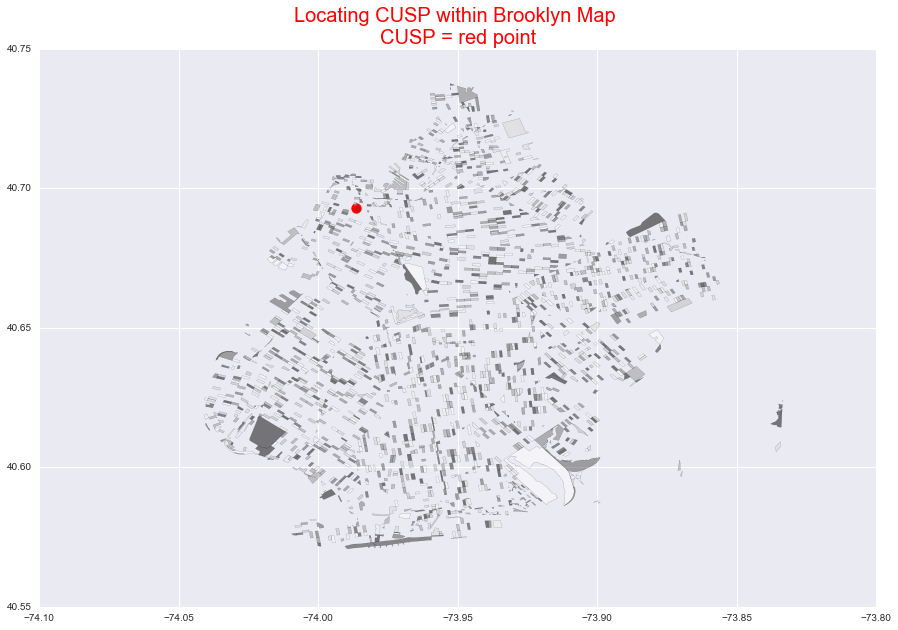

In [18]:
# ploting Brooklyn geoDataFrame with CUSP as a single red scatter point
ct_shape_bk_latlon.iloc[::5,:].plot(linewidth=.1,figsize=(15,20)) #column='CT2010', alpha=1
plt.scatter(point.x, point.y, color='r', s=100)
plt.title('Locating CUSP within Brooklyn Map \nCUSP = red point', color='r', fontsize=20)

# Figure: Cusp's coordinate point (40.6931, -73.9866) - (lat, lon)
## Lat = y-axis
## Lon = x-axis